# Final Code

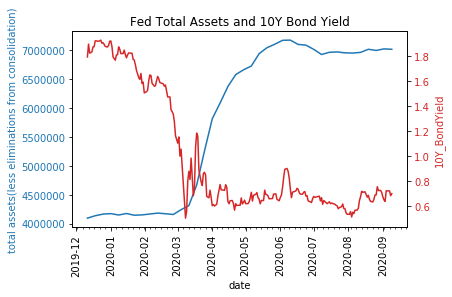

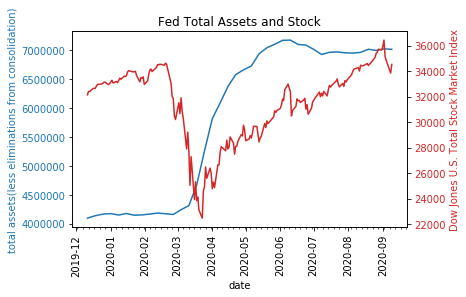

In [300]:
#---import---#
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.dates as mdates
# read Fed's Total Assets
df = pd.read_csv('/Users/jaewanpark/Desktop/Github_Rough/QE_reverse/Total_Assets.csv', parse_dates=['DATE'])
# read 10Y US Bond Yields
dff= pd.read_csv('/Users/jaewanpark/Desktop/Github_Rough/QE_reverse/US_10Year_BondYield.csv', parse_dates=['Date'])
dff2 = dff.copy().reindex(index=dff2.index[::-1]).rename(columns={"Change %" : "Rate"}).drop(columns= ['Rate', 'Open', 'High', 'Low'])
# plot
red = 'tab:red'
blue = 'tab:blue'
fig, ax1 = plt.subplots()
ax1.plot('DATE', 'WALCL', data=df2, color=blue)
ax1.set_title('Fed Total Assets and 10Y Bond Yield')
ax1.set_ylabel('total assets(less eliminations from consolidation)', color = blue)
ax1.set_xlabel('date')
ax1.tick_params(axis='y', labelcolor=blue)
fmt = mdates.DateFormatter('%Y-%m')
ax1.xaxis.set_major_formatter(fmt)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
fig.autofmt_xdate(rotation=90, ha='center')
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax2 = ax1.twinx()  
ax2.plot('Date','Price', data=dff2, color = red)
ax2.set_ylabel('10Y_BondYield', color = red)
ax2.tick_params(axis='y', labelcolor=red)
plt.show()

#---Stock---#
# read stock data
dfff = pd.read_csv('/Users/jaewanpark/Desktop/Github_Rough/QE_reverse/HistoricalPrices.csv', parse_dates = ["Date"])
dfff2 = dfff.copy().drop(columns=[" Open"," High"," Low"])
dfff2
# data tyding
dfff2[" Close"] = round(dfff2[" Close"])
dfff2[" Close"] = dfff2[" Close"].astype(int)
#plot
fig, ax1 = plt.subplots()
ax1.plot('DATE','WALCL', data=df2, color = blue)
ax1.tick_params(axis='y', labelcolor=blue)
ax1.set_title('Fed Total Assets and Stock')
ax1.set_ylabel('total assets(less eliminations from consolidation)', color=blue)
ax1.set_xlabel('date')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
fmt = mdates.DateFormatter('%Y-%m')
ax1.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate(rotation=90, ha='center')
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax3 = ax1.twinx()
ax3.plot("Date", " Close", data=dfff2, color = red)
ax3.set_ylabel('Dow Jones U.S. Total Stock Market Index', color = red)
ax3.tick_params(axis='y', labelcolor=red)
plt.show()

# Coding Process

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates
import matplotlib.dates as mdates

In [217]:
os.getcwd()

'/Users/jaewanpark/Desktop/Github_Rough/QE_reverse'

In [218]:
df = pd.read_csv('/Users/jaewanpark/Desktop/Github_Rough/QE_reverse/Total_Assets.csv', parse_dates=['DATE'])
df

,DATE,WALCL
0,2002-12-18,719542.0
1,2002-12-25,732059.0
2,2003-01-01,730994.0
3,2003-01-08,723762.0
4,2003-01-15,720074.0
...,...,...
921,2020-08-12,6957277.0
922,2020-08-19,7010637.0
923,2020-08-26,6990418.0
924,2020-09-02,7017492.0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    926 non-null    datetime64[ns]
 1   WALCL   926 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


In [220]:
df2 = df.copy().tail(40)
df2

,DATE,WALCL
886,2019-12-11,4095491.0
887,2019-12-18,4137052.0
888,2019-12-25,4165591.0
889,2020-01-01,4173626.0
890,2020-01-08,4149544.0
891,2020-01-15,4175850.0
892,2020-01-22,4145912.0
893,2020-01-29,4151630.0
894,2020-02-05,4166707.0
895,2020-02-12,4182689.0


In [221]:
# 10Y Bond Yields
dff= pd.read_csv('/Users/jaewanpark/Desktop/Github_Rough/QE_reverse/US_10Year_BondYield.csv', parse_dates=['Date'])
dff2 = dff.copy().reindex(index=dff2.index[::-1]).rename(columns={"Change %" : "Rate"}).drop(columns= ['Rate', 'Open', 'High', 'Low'])
dff2

,Date,Price
0,2020-09-09,0.698
1,2020-09-08,0.682
2,2020-09-07,0.720
3,2020-09-04,0.721
4,2020-09-03,0.636
...,...,...
221,2019-12-16,1.873
222,2019-12-15,1.833
223,2019-12-13,1.824
224,2019-12-12,1.896


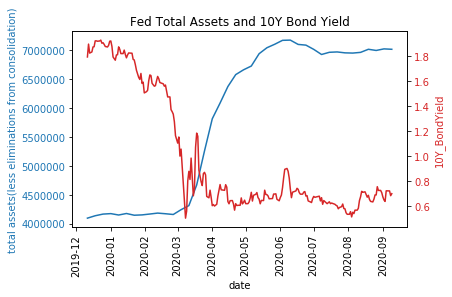

In [296]:
#---Total Assets---#
red = 'tab:red'
blue = 'tab:blue'
# plot(kind=line) data
fig, ax1 = plt.subplots()
ax1.plot('DATE', 'WALCL', data=df2, color=blue)
# labelling
ax1.set_title('Fed Total Assets and 10Y Bond Yield')
ax1.set_ylabel('total assets(less eliminations from consolidation)', color=blue)
ax1.set_xlabel('date')
ax1.tick_params(axis='y', labelcolor=blue)
# format x ticks
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
fmt = mdates.DateFormatter('%Y-%m-%d')
ax1.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate(rotation=90, ha='center')

#---Bond Yield(10Y)---#
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot('Date','Price', data=dff2, color = red)
ax2.set_ylabel('10Y_BondYield', color=red)
ax2.tick_params(axis='y', labelcolor=red)

plt.show()

In [257]:
# read stock data
dfff = pd.read_csv('/Users/jaewanpark/Desktop/Github_Rough/QE_reverse/HistoricalPrices.csv', parse_dates = ["Date"])
dfff2 = dfff.copy().drop(columns=[" Open"," High"," Low"])
dfff2

,Date,Close
0,2020-09-09,34527.94
1,2020-09-08,33848.56
2,2020-09-04,34848.03
3,2020-09-03,35138.18
4,2020-09-02,36434.12
...,...,...
183,2019-12-17,32652.42
184,2019-12-16,32632.83
185,2019-12-13,32395.74
186,2019-12-12,32406.55


In [288]:
dfff2[" Close"] = round(dfff2[" Close"])
dfff2[" Close"] = dfff2[" Close"].astype(int)
dfff2.info()
dfff2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    188 non-null    datetime64[ns]
 1    Close  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


,Date,Close
0,2020-09-09,34528
1,2020-09-08,33849
2,2020-09-04,34848
3,2020-09-03,35138
4,2020-09-02,36434
...,...,...
183,2019-12-17,32652
184,2019-12-16,32633
185,2019-12-13,32396
186,2019-12-12,32407


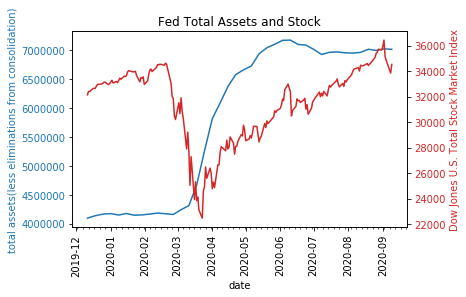

In [294]:
# plot
fig, ax1 = plt.subplots()
ax1.plot('DATE','WALCL', data=df2, color = blue)
ax1.tick_params(axis='y', labelcolor=blue)
ax1.set_title('Fed Total Assets and Stock')
ax1.set_ylabel('total assets(less eliminations from consolidation)', color=blue)
ax1.set_xlabel('date')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
fmt = mdates.DateFormatter('%Y-%m')
ax1.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate(rotation=90, ha='center')
ax1.xaxis.set_minor_locator(MultipleLocator(5))

ax3 = ax1.twinx()
ax3.plot("Date", " Close", data=dfff2, color = red)
ax3.set_ylabel('Dow Jones U.S. Total Stock Market Index', color = red)
ax3.tick_params(axis='y', labelcolor=red)